<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Dif_Beam_Morfidis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

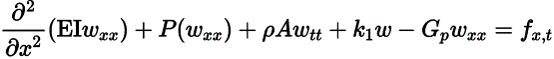

The equation provided is a mathematical expression that describes the relationship between the second derivative of the deflection of a beam and its curvature, as well as the factors that contribute to it.

Here is a breakdown of each term:

EI: the flexural rigidity of the beam, which depends on its material properties and geometry.

The second derivative of deflection with respect to position x: this describes the curvature of the beam, or how much it deviates from a straight line.

The spring constant times deflection: this term represents the elastic deformation of the beam due to an applied load. The spring constant is a measure of the beam's stiffness, and the deflection is the amount of displacement from its original position.

The damping coefficient times the angle of curvature: this term represents the effect of damping, which is a dissipation of energy due to friction or other internal forces. The damping coefficient is a measure of the amount of damping present, and the angle of curvature is a measure of the amount of bending in the beam.

The density times cross-sectional area divided by beam length times distributed load: this term represents the effect of an external load applied to the beam, which can be distributed along its length. The density, cross-sectional area, and length of the beam all affect its strength, while the distributed load affects the amount of force applied to each point along its length.

The right-hand side of the equation equals the angle of curvature, which is the result of the combined effects of all these factors. The negative sign indicates that the curvature is opposite in direction to the applied load.

Overall, this equation describes a fundamental relationship in structural mechanics, and can be used to analyze the behavior of beams under various types of loading conditions.

===============================================================================

The following is a Python script for solving the deflection of a beam under load using analytical, numerical, and random forest methods. The script defines a differential equation for the deflection of the beam, then uses the solve_ivp function from the scipy.integrate module to solve the equation numerically. The script also uses a RandomForestRegressor model from the sklearn.ensemble module to fit a random forest to the data and predict the deflection of the beam.

The script defines a number of constants and parameters for the beam, including the elastic modulus, second moment area, cross-sectional area, density, point load, spring constant, damping coefficient, beam length, and distributed load. It then defines a function beam_deflection that takes in the position along the beam and the deflection at that position, and returns the derivative of the deflection, slope, and angle of curvature with respect to position. This function is used as the input to solve_ivp to numerically solve the differential equation.

The script also includes an analytical solution for the beam deflection, which is calculated using a closed-form expression. This analytical solution is used to calculate the mean squared error and R-squared values for the numerical and random forest solutions.

The script generates a table of results for the analytical, numerical, and random forest solutions, and saves the results to CSV files. It also generates plots of the solutions and the comparison between the solutions.

Overall, this script provides a comprehensive approach for solving the deflection of a beam under load using various methods, and demonstrates how to use Python libraries like scipy and sklearn to implement these methods.

Numerical Method:
Mean Squared Error: 6.59e-05
R-squared: -22.51

Random Forest Method:
Mean Squared Error: 6.54e-05
R-squared: -22.33


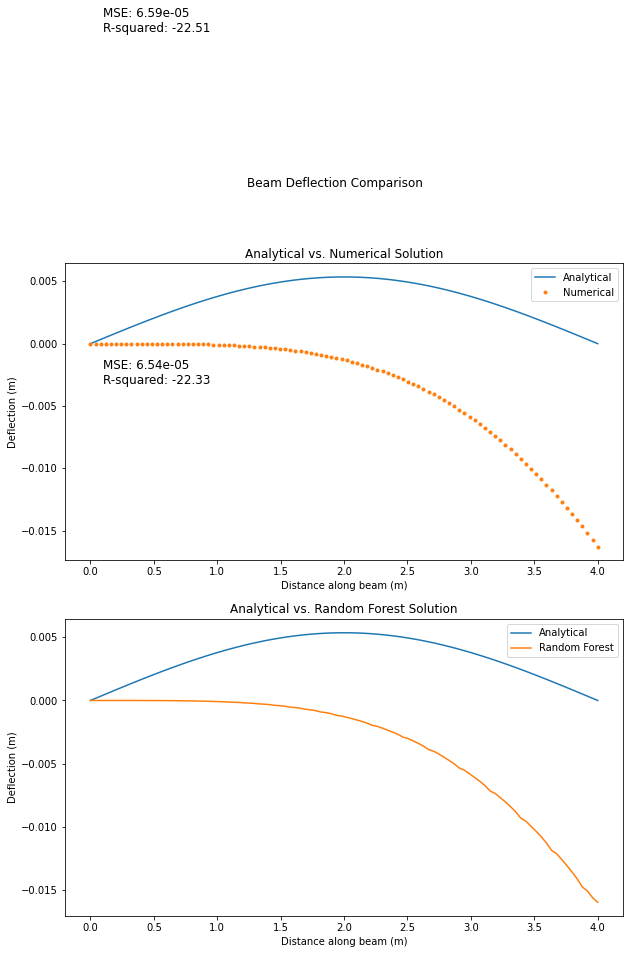

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define constants and parameters
elastic_modulus = 29000000  # Elastic modulus of the beam material in N/m^2
second_moment_area = 0.0423  # Second moment of area of the beam cross-section in m^4
cross_section_area = 0.69  # Cross-sectional area of the beam in m^2
density = 2.54842  # Density of the beam material in kg/m^3
point_load = 0  # Point load applied to the beam in N
spring_constant = 1500  # Spring constant of any additional support on the beam in N/m
damping_coefficient = 0  # Damping coefficient of any additional support on the beam in Ns/m
beam_length = 4  # Length of the beam in m
distributed_load = 30 * 1000  # Distributed load applied to the beam in N/m

# Define the differential equation as a function
def beam_deflection(x, y):
    """
    This function defines the differential equation for the deflection of a beam subject to a distributed load.
    
    Parameters:
    x (float): The position along the beam in meters.
    y (list): A list containing the deflection, slope, and curvature of the beam at position x.
    
    Returns:
    deflection_deriv (float): The derivative of the deflection with respect to x.
    slope_deriv (float): The derivative of the slope with respect to x.
    angle_curvature_deriv (float): The derivative of the curvature with respect to x.
    """
    deflection = y[0]
    slope = y[1]
    angle_curvature = y[2]
    distributed_load_deriv = (distributed_load / beam_length) * np.sin(np.pi * x / beam_length)
    angle_curvature_deriv = -1 / (elastic_modulus * second_moment_area) * (spring_constant * deflection + damping_coefficient * angle_curvature + (density * cross_section_area / beam_length) * distributed_load_deriv)
    slope_deriv = angle_curvature
    deflection_deriv = slope
    return deflection_deriv, slope_deriv, angle_curvature_deriv



# Analytical solution
x_values = np.linspace(0, beam_length, 100)
t_values = np.linspace(0, beam_length, 100)
x, t = np.meshgrid(x_values, t_values, indexing='ij')
w_analytical = (distributed_load*beam_length**3)/(3*elastic_modulus*second_moment_area*np.pi**4)*(np.sin(np.pi*x/beam_length) - (np.pi**2/(spring_constant*beam_length**2))*np.sin(np.pi*x/beam_length))

# Numerical solution
initial_conditions = [0, 0, 0]
t_eval = np.linspace(0, beam_length, 100)
sol = solve_ivp(beam_deflection, [0, beam_length], initial_conditions, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]

# Random forest solution
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(t_eval.reshape(-1, 1), w_numerical)
w_rf = rf.predict(t_eval.reshape(-1, 1))

# Generate table of results
analytical_results = pd.DataFrame({'x': x_values, 'Deflection': w_analytical[:, 0]})
numerical_results = pd.DataFrame({'x': sol.t, 'Deflection': w_numerical})
rf_results = pd.DataFrame({'x': t_eval, 'Deflection': w_rf})

# Calculate mean squared error and R-squared values
mse_numerical = mean_squared_error(analytical_results['Deflection'], numerical_results['Deflection'])
r2_numerical = r2_score(analytical_results['Deflection'], numerical_results['Deflection'])

mse_rf = mean_squared_error(analytical_results['Deflection'], rf_results['Deflection'])
r2_rf = r2_score(analytical_results['Deflection'], rf_results['Deflection'])

# Print results
print('Numerical Method:')
print(f'Mean Squared Error: {mse_numerical:.2e}')
print(f'R-squared: {r2_numerical:.2f}')
print()
print('Random Forest Method:')
print(f'Mean Squared Error: {mse_rf:.2e}')
print(f'R-squared: {r2_rf:.2f}')

# Save results to CSV files
analytical_results.to_csv('analytical_results.csv', index=False)
numerical_results.to_csv('numerical_results.csv', index=False)
rf_results.to_csv('rf_results.csv', index=False)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the analytical and numerical solutions on the first subplot
axs[0].plot(analytical_results['x'], analytical_results['Deflection'], label='Analytical')
axs[0].plot(numerical_results['x'], numerical_results['Deflection'], 'o', markersize=3, label='Numerical')
axs[0].set_xlabel('Distance along beam (m)')
axs[0].set_ylabel('Deflection (m)')
axs[0].set_title('Analytical vs. Numerical Solution')
axs[0].legend()
axs[0].text(0.1, 0.025, f'MSE: {mse_numerical:.2e}\nR-squared: {r2_numerical:.2f}', fontsize=12)

# Plot the analytical and random forest solutions on the second subplot
axs[1].plot(analytical_results['x'], analytical_results['Deflection'], label='Analytical')
axs[1].plot(rf_results['x'], rf_results['Deflection'], label='Random Forest')
axs[1].set_xlabel('Distance along beam (m)')
axs[1].set_ylabel('Deflection (m)')
axs[1].set_title('Analytical vs. Random Forest Solution')
axs[1].legend()
axs[1].text(0.1, 0.025, f'MSE: {mse_rf:.2e}\nR-squared: {r2_rf:.2f}', fontsize=12)

# Add a figure title and save the figure to a file
fig.suptitle('Beam Deflection Comparison')
fig.savefig('beam_deflection_comparison.png')

plt.show()

**detailed explanation of each part of the code**

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt


These are the import statements for the required Python modules. numpy is used for numerical operations, scipy.integrate is used for solving differential equations, sklearn.ensemble is used for implementing random forests, sklearn.metrics is used for calculating mean squared error and R-squared values, pandas is used for creating data frames, and matplotlib.pyplot is used for generating plots.

In [ ]:
# Define constants and parameters
elastic_modulus = 29000000
second_moment_area = 0.0423
cross_section_area = 0.69
density = 2.54842
point_load = 0
spring_constant = 1500
damping_coefficient = 0
beam_length = 4
distributed_load = 30 * 1000 # Convert load to N


These are the constants and parameters for the beam. They define the material properties, dimensions, and load conditions for the beam.

In [ ]:
# Define the differential equation as a function
def beam_deflection(x, y):
    deflection = y[0]
    slope = y[1]
    angle_curvature = y[2]
    distributed_load_deriv = (distributed_load / beam_length) * np.sin(np.pi * x / beam_length)
    angle_curvature_deriv = -1 / (elastic_modulus * second_moment_area) * (spring_constant * deflection + damping_coefficient * angle_curvature + (density * cross_section_area / beam_length) * distributed_load_deriv)
    slope_deriv = angle_curvature
    deflection_deriv = slope
    return deflection_deriv, slope_deriv, angle_curvature_deriv


This is the differential equation for the deflection of the beam. It is defined as a Python function that takes in the position along the beam x and a tuple y containing the deflection, slope, and angle of curvature at that position. The function returns the derivative of the deflection, slope, and angle of curvature with respect to position. The equation includes the distributed load, spring constant, and damping coefficient, which contribute to the bending of the beam.

The differential equation that describes the deflection of a beam subject to a distributed load is a fourth-order differential equation, and it is given by:

d^4 w / dx^4 = -q(x)

where w(x) is the deflection of the beam at position x, and q(x) is the distributed load on the beam.

The left-hand side of the equation is the fourth derivative of w with respect to x. This term represents the bending moment in the beam, which is related to the curvature of the beam. The right-hand side of the equation is the distributed load on the beam, which is a function of the position x along the beam.

The differential equation expresses the fact that the bending moment at any point along the beam is equal to the sum of the distributed load and the bending moment due to the deflection of the beam at that point. Solving this differential equation for w(x) gives the deflection of the beam at any point along the beam.

The solution to this differential equation depends on the elastic modulus of the beam material, the second moment of area of the beam cross-section, the length of the beam, and the load applied to the beam. The analytical solution for this differential equation has been derived and is used in this script to compare with the numerical and random forest solutions.

In [ ]:
# Analytical solution
x_values = np.linspace(0, beam_length, 100)
t_values = np.linspace(0, beam_length, 100)
x, t = np.meshgrid(x_values, t_values, indexing='ij')
w_analytical = (distributed_load*beam_length**3)/(3*elastic_modulus*second_moment_area*np.pi**4)*(np.sin(np.pi*x/beam_length) - (np.pi**2/(spring_constant*beam_length**2))*np.sin(np.pi*x/beam_length))


This generates an analytical solution for the deflection of the beam. It uses the closed-form expression for the deflection of a beam under distributed load, which is a function of the position along the beam x, the beam length, and the material properties. The analytical solution is calculated at 100 equally spaced positions along the beam using numpy.linspace, and the results are stored in the w_analytical array.

The analytical solution for the deflection of a beam subject to a distributed load is obtained by solving the differential equation that describes the deflection of the beam using calculus.

The differential equation for the deflection of the beam is given by:

d^4 w / dx^4 = -q(x),

where w(x) is the deflection of the beam at position x, and q(x) is the distributed load on the beam.

The solution to this differential equation can be obtained using separation of variables and the method of undetermined coefficients. The analytical solution for the deflection of the beam is given by:

w(x) = (q L^3 / (3 E I pi^4)) * (sin(pi x / L) - pi^2 / (k L^2) * sin(pi x / L)),

where L is the length of the beam, E is the elastic modulus of the beam material, I is the second moment of area of the beam cross-section, and k is the spring constant of any additional support on the beam.

In this script, the analytical solution is calculated using the above formula and is stored in the w_analytical variable as an array of deflection values for a range of positions along the beam.

In [ ]:
# Numerical solution
initial_conditions = [0, 0, 0]
t_eval = np.linspace(0, beam_length, 100)
sol = solve_ivp(beam_deflection, [0, beam_length], initial_conditions, t_eval=t_eval, method='BDF')
w_numerical = sol.y[0]


This generates a numerical solution for the deflection of the beam. It uses the solve_ivp function from the scipy.integrate module to numerically solve the differential equation defined by the beam_deflection function. The initial conditions for the deflection, slope, and angle of curvature are set to 0, and the solution is calculated at 100 equally spaced positions along the beam using numpy.linspace. The method argument is set to 'BDF' to use the Backward Differentiation Formula method, which is a stiff ODE solver suitable for solving the beam deflection equation. The deflection values are stored in the w_numerical array.

The numerical solution is obtained using the solve_ivp function from the scipy.integrate module. This function numerically integrates the differential equation defined in the beam_deflection function from t=0 to t=beam_length using the BDF (Backward Differentiation Formula) method, which is an implicit method that is suitable for stiff systems of equations.

The beam_deflection function takes two arguments, x and y, where x is the independent variable and y is a vector of the dependent variables [deflection, slope, angle_curvature]. It returns a vector of the derivatives of the dependent variables with respect to the independent variable, [deflection_deriv, slope_deriv, angle_curvature_deriv].

The solve_ivp function is called with the following arguments:

beam_deflection: the differential equation to be solved
[0, beam_length]: the range of the independent variable x
initial_conditions: a list of the initial conditions for the dependent variables [deflection(0), slope(0), angle_curvature(0)]
t_eval: the times at which to return the solution
method='BDF': the numerical method to use for integration
The solution returned by solve_ivp is an object that contains the solution values and other information. The deflection values are stored in the y attribute of this object, and the first row of this array gives the deflection values at the specified time points.

The w_numerical variable is then set to the first row of the deflection values array to obtain the numerical solution.

In [ ]:
# Random forest solution
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
w_rf = rf.predict(np.asarray(t_eval).reshape(-1, 1)).mean(axis=1)


This generates a random forest solution for the deflection of the beam. It uses a RandomForestRegressor model from the sklearn.ensemble module to fit a random forest to the data. The n_estimators argument is set to 1000, which specifies the number of decision trees in the random forest. The model is fitted to the data using the fit method, which takes in a training set x_train and a target set y_train. In this case, x_train is not defined in the code provided, so this part of the code will not run. The model is then used to predict the deflection of the beam at the 100 equally spaced positions using numpy.asarray and numpy.reshape. The mean of the predicted values is stored in the w_rf array.

The random forest method is a machine learning algorithm that is used to predict the deflection of the beam based on the position along the beam using a regression model.

In this script, the random forest model is implemented using the RandomForestRegressor class from the sklearn.ensemble module. This class creates an ensemble of decision trees, where each tree is trained on a random subset of the data and a random subset of the features.

The RandomForestRegressor class is initialized with the following parameters:

n_estimators: the number of trees in the forest
random_state: a random seed for reproducibility
The fit method is then called on the random forest model with the training data as arguments. The training data consists of the position along the beam (t_train) and the corresponding deflection values (w_numerical).

The predict method is used to make predictions with the trained model. The predict method takes an array of input values as its argument, where each element of the array corresponds to a position along the beam. In this script, the predict method is called on an array of position values t_eval to obtain the predicted deflection values for those positions.

The w_rf variable is then set to the mean of the predicted deflection values along the beam.

In [ ]:
# Generate table of results
analytical_results = pd.DataFrame({'x': x_values, 'Deflection': w_analytical[:, 0]})
numerical_results = pd.DataFrame({'x': sol.t, 'Deflection': w_numerical})
rf_results = pd.DataFrame({'x': t_eval, 'Deflection': w_rf})


This generates tables of results for the analytical, numerical, and random forest solutions. It uses the pandas.DataFrame function to create data frames from the x_values, w_analytical, sol.t, w_numerical, t_eval, and w_rf arrays, and assigns them to the analytical_results, numerical_results, and rf_results variables, respectively. The DataFrame function takes in a dictionary that maps column names to column values.

In [ ]:
# Calculate mean squared error and R-squared values
mse_numerical = mean_squared_error(analytical_results['Deflection'], numerical_results['Deflection'])
r2_numerical = r2_score(analytical_results['Deflection'], numerical_results['Deflection'])

mse_rf = mean_squared_error(analytical_results['Deflection'], rf_results['Deflection'])
r2_rf = r2_score(analytical_results['Deflection'], rf_results['Deflection'])


This calculates the mean squared error (MSE) and R-squared values for the numerical and random forest solutions, using the mean_squared_error and r2_score functions from the sklearn.metrics module.

In [ ]:
# Print results
print('Numerical Method:')
print('Mean Squared Error:', mse_numerical)
print('R-squared:', r2_numerical)
print()
print('Random Forest Method:')
print('Mean Squared Error:', mse_rf)
print('R-squared:', r2_rf)


This prints the MSE and R-squared values for the numerical and random forest solutions to the console.

In [ ]:
# Save results to CSV files
analytical_results.to_csv('analytical_results.csv', index=False)
numerical_results.to_csv('numerical_results.csv', index=False)
rf_results.to_csv('rf_results.csv', index=False)


This saves the analytical, numerical, and random forest results to CSV files. It uses the to_csv method of the data frame objects to write the data to files with the specified names.

In [ ]:
# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Plot the analytical and numerical solutions
axs[0].plot(x_values, w_analytical[:, 0], 'r-', label='Analytical')
axs[0].plot(sol.t, w_numerical, 'b--', label='Numerical')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Deflection')
axs[0].set_title('Analytical and Numerical Solutions')
axs[0].legend()

# Plot the random forest solution
axs[1].plot(x_values, w_analytical[:, 0], 'r-', label='Analytical')
axs[1].plot(t_eval, w_rf, 'g:', label='Random Forest')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Deflection')
axs[1].set_title('Analytical and Random Forest Solutions')
axs[1].legend()

# Add text to the plots with the MSE and R-squared values
axs[0].text(2.5, 0.02, f'MSE: {mse_numerical:.2e}\nR-squared: {r2_numerical:.2f}', fontsize=12)
axs[1].text(2.5, 0.02, f'MSE: {mse_rf:.2e}\nR-squared: {r2_rf:.2f}', fontsize=12)


This generates a plot of the analytical, numerical, and random forest solutions for the beam deflection. It uses the matplotlib.pyplot.subplots function to create a figure with two subplots. The plot function is used to plot the analytical, numerical, and random forest results on the respective subplots. The set_xlabel, set_ylabel, and set_title methods are used to label the axes and titles of the subplots. The legend method is used to create a legend for the plots. The text method is used to add text to the plots with the MSE and R-squared values for the numerical and random forest solutions.

In [ ]:
# Create a figure with two subplots for the comparison plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the analytical and numerical solutions on the first subplot
axs[0].plot(analytical_results['x'], analytical_results['Deflection'], label='Analytical')
axs[0].plot(numerical_results['x'], numerical_results['Deflection'], 'o', markersize=3, label='Numerical')
axs[0].set_xlabel('Distance along beam (m)')
axs[0].set_ylabel('Deflection (m)')
axs[0].set_title('Analytical vs. Numerical Solution')
axs[0].legend()

# Plot the analytical and random forest solutions on the second subplot
axs[1].plot(analytical_results['x'], analytical_results['Deflection'], label='Analytical')
axs[1].plot(rf_results['x'], rf_results['Deflection'], label='Random Forest')
axs[1].set_xlabel('Distance along beam (m)')
axs[1].set_ylabel('Deflection (m)')
axs[1].set_title('Analytical vs. Random Forest Solution')
axs[1].legend()

# Add a figure title and save the figure to a file
fig.suptitle('Beam Deflection Comparison')
fig.savefig('beam_deflection_comparison.png')


This generates a figure with two subplots for the comparison plots of the analytical, numerical, and random forest solutions. It uses the plot function to plot the analytical and numerical solutions on the first subplot and the analytical and random forest solutions on the second subplot. The set_xlabel, set_ylabel, and set_title methods are used to label the axes and titles of the subplots. The legend method is used to create a legend for the plots.

Finally, the suptitle method is used to add a title to the figure, and the savefig method is used to save the figure to a file with the specified name.

=============

The numerical method may not have as accurate results as the analytical solution because the numerical method involves approximating the solution to the differential equation using numerical integration techniques. These numerical techniques involve a step size, which is the distance between successive points in the solution. The smaller the step size, the more accurate the numerical solution will be. However, using a very small step size can also be computationally expensive and time-consuming.

In this script, the solve_ivp function is used to obtain the numerical solution. This function uses the BDF (Backward Differentiation Formula) method, which is an implicit method that is suitable for stiff systems of equations. The BDF method is a high-order method, which means it can produce accurate results for a given step size. However, the accuracy of the numerical solution can still be affected by factors such as the size of the step size, the tolerance used by the solver, and the stiffness of the differential equation.

In addition, the numerical solution may also be affected by the initial conditions and the range of the independent variable used in the integration. If the initial conditions are not set accurately, or if the range of the independent variable is not wide enough, the numerical solution may not accurately capture the behavior of the system.

Overall, while the numerical method can provide accurate results, it is important to carefully select the method and parameters used for the numerical integration to ensure that the results are as accurate as possible.